In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import gc

from joblib import Parallel, delayed
from tqdm import *

%matplotlib inline

In [2]:
ROOT = "/media/felipe/SAMSUNG/delicioust140/"

In [3]:
pd.__version__

'0.20.1'

In [4]:
FILE=ROOT+"taginfo.xml"

In [5]:
tree = ET.parse(FILE)

In [6]:
dataset = tree.getroot()

In [7]:
tags_df = pd.DataFrame(columns=['tag','count'])

In [8]:
def get_attribute_dict_from_document_node(document):
    attrs = dict()    
    
    for attribute_node in document:
                       
        tags = []
        
        if attribute_node.tag == 'tags':
            for tag_node in attribute_node:
                for subnode in tag_node:
                    if subnode.tag == 'name':
                        if subnode.text is not None:
                            tags.append(subnode.text)

            attrs['tags'] = ','.join(tags)              
                        
        else:
            attrs[attribute_node.tag] = attribute_node.text
            
            
    return attrs        

In [9]:
elements = Parallel(n_jobs=-1)(delayed(get_attribute_dict_from_document_node)(document) for document in dataset)

In [10]:
docs_df = pd.DataFrame(columns=['url','hash','filetype','filename','users','tags'])

In [23]:
docs_df = pd.DataFrame.from_records(elements)

In [24]:
docs_df['num_tags'] = docs_df['tags'].apply(lambda tags: len(tags.split(',')))

In [25]:
docs_df.rename(columns={'users':'num_users'},inplace=True)

In [28]:
docs_df['num_users'] = docs_df['num_users'].astype('int64')
docs_df['num_tags'] = docs_df['num_tags'].astype('int64')

In [29]:
docs_df.describe(include=['number'])

,num_users,num_tags
count,144574.000000,144574.000000
mean,182.173109,13.950351
std,663.709148,8.390065
min,1.000000,1.000000
25%,13.000000,6.000000
50%,35.000000,12.000000
75%,121.000000,24.000000
max,46215.000000,31.000000


In [30]:
docs_df.describe(include=['category','object'])

,filename,filetype,hash,tags,url
count,144574,144574,144574,144574,144574
unique,144574,5,144574,144032,144574
top,ef5098fd87e15880a968b10e049d1936.html,html,3aed6052ca547073e5348e4010c3eb42,"wordpress,themes,theme",http://zeniltuo.com/
freq,1,143716,1,15,1


In [31]:
docs_df.dtypes

filename     object
filetype     object
hash         object
tags         object
url          object
num_users     int64
num_tags      int64
dtype: object

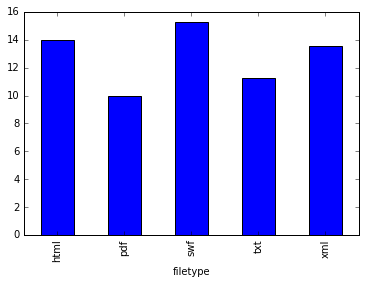

In [32]:
# mean num_tags by type
docs_df.groupby('filetype')['num_tags'].mean().plot(kind='bar')

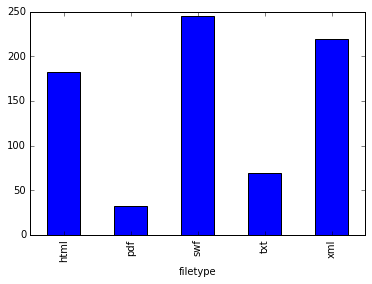

In [33]:
# mean num_users by type
docs_df.groupby('filetype')['num_users'].mean().plot(kind='bar')

In [34]:
max(set(docs_df['num_users'].values))

46215

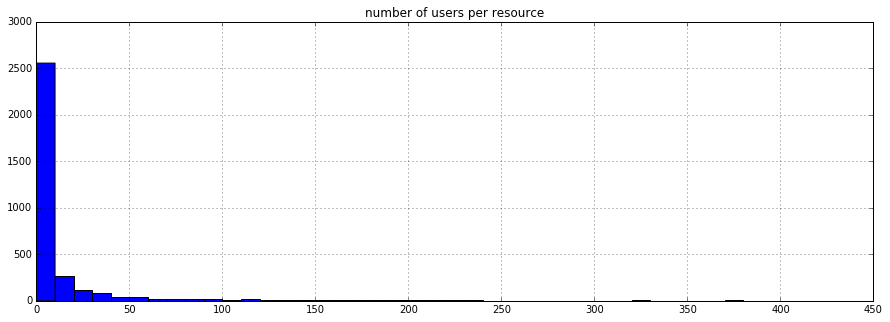

In [35]:
plt.clf()
docs_df.groupby('num_users')['hash'].count().hist(bins=np.arange(0,450,10))

fig = plt.gcf()
fig.set_size_inches(15,5)

plt.gca().set_title('number of users per resource')

In [36]:
len(docs_df[docs_df['num_tags'] == 25])

31511

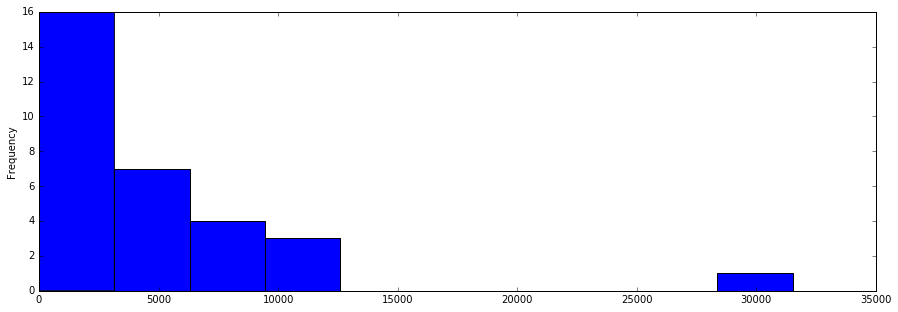

In [37]:
plt.clf()
docs_df.groupby('num_tags')['hash'].count().plot(kind='hist')

fig = plt.gcf()
fig.set_size_inches(15,5)

# plt.gca().set_title('number of users per resource')

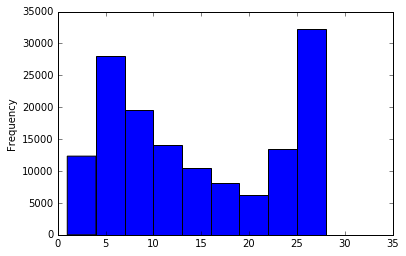

In [38]:
docs_df.num_tags.plot(kind='hist')